# Seattle AirBNB  

This notebook serves to perform predictive analysis of Seattle AirBNB data. The data will be analysed according to CRISP-DM standards:


1. Business Understanding

2. Data Understanding

3. Data Preparation

4. Modeling

5. Evaluation and Scoring

6. Communication


In addition to this notebook, please refer to the README.md file which contains extra information on the analysis process. 

## Business Understanding

[AirBNB](https://www.airbnb.co.za/) is a company that connects travellers and property owners, allowing the former to rent a living space from the latter. 

Hosts are required to provide an acceptable living environment within the spaces they are willing to provide, and it is recommended that they stock essential amenities (such as toilet paper, soap, towels, pillows and linens) for their guests. Hosts are encouraged to uphold and exhibit all the foundational principles of hospitality towards their guests, and ultimately work to ensure that guests enjoy their stay and hence keep using the AirBNB platform.
AirBNB offers a comprehensive guideline for hosts [here](https://www.airbnb.co.za/help/article/576/host-requirements)

Guests can peruse the AirBNB [web page](https://www.airbnb.co.za/) or app for living spaces that would provide for their travelling needs. Whether it be for holiday or work purposes, the wide assortment of property types that are available for rent are sure to provide for any situation that potential guests may desire. Living spaces include (but are not limited to):
- beachfronts
- cabins
- countryside homes
- BNBs
- farms
- city apartments

In the same way that hosts are encouraged to provide the best possible living space for their guests, guests are encouraged to respect the property and space of the people from whom they are renting. 

In the unlikely event that hosts do not treat their guests as promised, or if damages should occur to the property being rented, AirBNB offers comprehensive insurance in the form of "AirCover". This is a unique selling point for AirBNB, as according to this [article](https://www.airbnb.co.za/aircover), it provides a booking protection guarantee, check-in guarantee, get-what-you-booked guarantee, and provides a 24-hour safety line for guests to use. AirCover also provides insurance for [hosts](https://www.airbnb.co.za/help/article/3142/getting-protected-through-aircover-for-hosts) where 1 million (USD) in damage protection and a further 1 million (USD) in liability insurance is given.

AirBNB has certainly made waves in terms of how people travel and work, and has taken upwards of [20%](https://hospitable.com/competitors-for-airbnb/) of the rental property market share. More and more people are looking for reliable and safe rental property solutions, and it would seem that AirBNB is happy to provide them.

## Data Understanding

The previous section outlined the kind of business environment that this analysis takes place in. By looking at the data available, questions can be formulated which when answered should provide useful insights that will help analysts better understand AirBNB. The necessary data inspection steps are conducted below, and the questions will follow.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import warnings

warnings.simplefilter('ignore')
sns.set()

### Import Data

In [2]:
calendar_df = pd.read_csv('calendar.csv')
print(calendar_df.shape)
calendar_df.head()

(1393570, 4)


,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


The calendar dataset focuses on **availability and price** of living spaces available on the AirBNB site.

In [3]:
reviews_df = pd.read_csv('reviews.csv')
print(reviews_df.shape)
reviews_df.head()

(84849, 6)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


The reviews dataset focuses on the **guest experiences** at places which have been rented.

In [4]:
listings_df = pd.read_csv('listings.csv')
print(listings_df.shape)
listings_df.head()

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


The listings_df dataset contains all the **detailed information** on each listing including host, property area, reviews, extra fees, and property characteristics.

### Business Questions

1. How does the time of year affect property availability?
2. What is the most common type of property rented?
3. Can the listing review score be predicted?

#### Question 1: How does the time of year affect property availability?

Hosts on AirBNB ideally should look to rent out their properties all year long to maximise their revenue. However, there will be times where more people are travelling and hence more people are looking to rent properties. It will be interesting to see during which seasons this is the case, and insightful for hosts to ensure their properties are ready and in the best possible condition to maximise their chance of hosting guests.

In [5]:
calendar_df.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [6]:
# Make datetime column(s) to make dates easier to work with

calendar_df['date_converted'] = pd.to_datetime(calendar_df['date'], format='%Y-%m-%d')
calendar_df['year'] = calendar_df['date_converted'].dt.year
calendar_df['month'] = calendar_df['date_converted'].dt.month
calendar_df['day'] = calendar_df['date_converted'].dt.day

In [7]:
calendar_df.head()

,listing_id,date,available,price,date_converted,year,month,day
0,241032,2016-01-04,t,$85.00,2016-01-04,2016,1,4
1,241032,2016-01-05,t,$85.00,2016-01-05,2016,1,5
2,241032,2016-01-06,f,NaN,2016-01-06,2016,1,6
3,241032,2016-01-07,f,NaN,2016-01-07,2016,1,7
4,241032,2016-01-08,f,NaN,2016-01-08,2016,1,8


In [8]:
# Split data according to available and unavailable listings for ease of grouping.

properties_available = calendar_df[calendar_df['available'] == 't']
properties_unavailable = calendar_df[calendar_df['available'] == 'f']

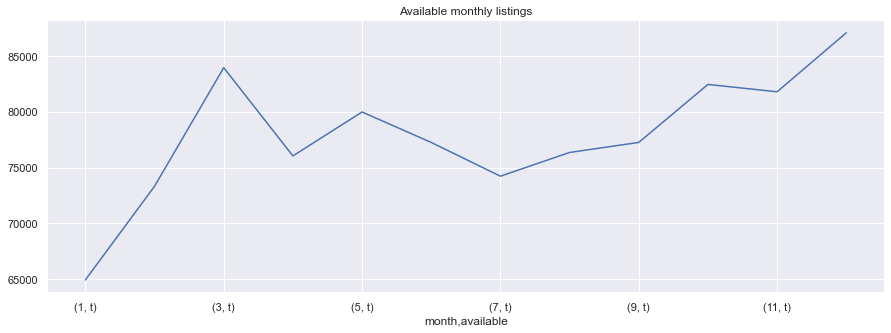

In [9]:
properties_available['available'].groupby(properties_available['month']).value_counts().plot(kind='line', figsize=(15, 5), title='Available monthly listings');

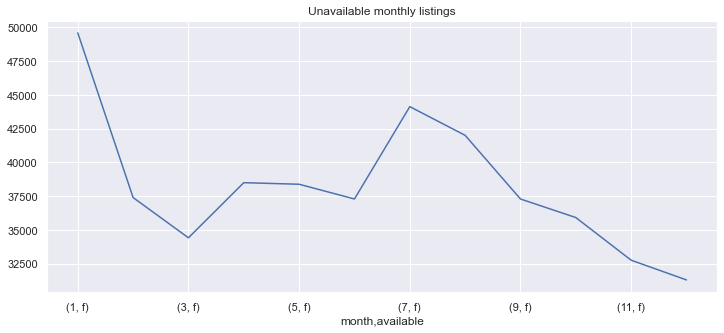

In [10]:
properties_unavailable['available'].groupby(properties_unavailable['month']).value_counts().plot(kind='line', figsize=(12, 5), title='Unavailable monthly listings');

The above trends show the number of available and unavailable Seattle AirBNB listings throughout the year. According to [this](https://weatherspark.com/y/913/Average-Weather-in-Seattle-Washington-United-States-Year-Round#:~:text=In%20Seattle%2C%20the%20summers%20are,or%20above%2088%C2%B0F.) article, the best time to visit Seattle is during the warmer summer months that occur from June-August. 

The graphs certainly suggest this is the case. While the total monthly available listings throughout the year always exceed the unavailable listings, there is a definite pattern of higher or lower listings activity that emerged over the year. 

"Unavailable" could be defined as either properties being taken off the AirBNB site for maintenance or personal use by the host, or more likely, because they are being rented out by guests. For the purpose of this question, it will be assumed that it is the latter case.

During the summer months, we see a climb in unavailable listings which may imply that more travellers are renting out available properties. Once September begins, a steady decline in the number of available listings occurs as guests return to their daily lives. Another spike in unavailable properties occurs during January, which may be linked to the festive season of Christmas and New Year's Day as well as other national holidays that occur in January. After this spike, there is a lull in rented listings from February to the summer months, where the influx of rentals can take place once again.

Ultimately, it can be concluded that the availability of listings is affected by the seasonal weather as well as festive holidays.

#### Question 2: What is the most common type of property rented?

New or existing hosts can be curious about what types of properties are most sought after by potential guests. By answering this question, hosts can take a wiser approach to property investments (or expansions), and maximise the likelihood of securing revenue for the rental season.

In [11]:
# The following lines of code were used for investigatory purposes and to ensure all the data did in fact relate to Seattle

print(listings_df.shape)
print()
print(listings_df['country'].value_counts())
print()
print(listings_df['city'].value_counts())
print()
print(listings_df['state'].value_counts())

(3818, 92)

United States    3818
Name: country, dtype: int64

Seattle                  3810
West Seattle                2
Seattle                     2
Ballard, Seattle            1
西雅图                         1
Phinney Ridge Seattle       1
seattle                     1
Name: city, dtype: int64

WA    3817
wa       1
Name: state, dtype: int64


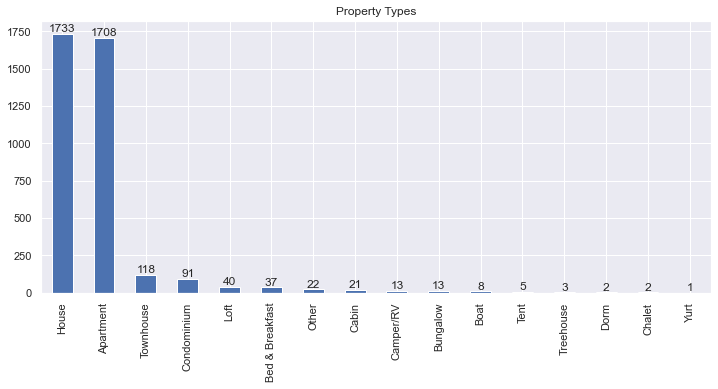

In [12]:
ax = listings_df['property_type'].value_counts().plot(kind='bar', figsize=(12, 5), title='Property Types');
ax.bar_label(ax.containers[0]);

It would appear that houses and apartments are the most common listed property types by a significant margin. Hosts wishing to provide similar services to existing listings would do well to obtain either of these types of properties, or benefit by providing one of the more rare listings available and adding a sense of exclusivity and rarity to their property. 

Following the logic from the previous question, if it is assumed that unavailable listings are rented listings, then the number of unavailable listings needs to be separated by type to observe which property type is rented most often.

In [13]:
# joining dataframes with listing information and calendar information

listings_calendar_df = pd.concat([calendar_df, listings_df], axis=1)

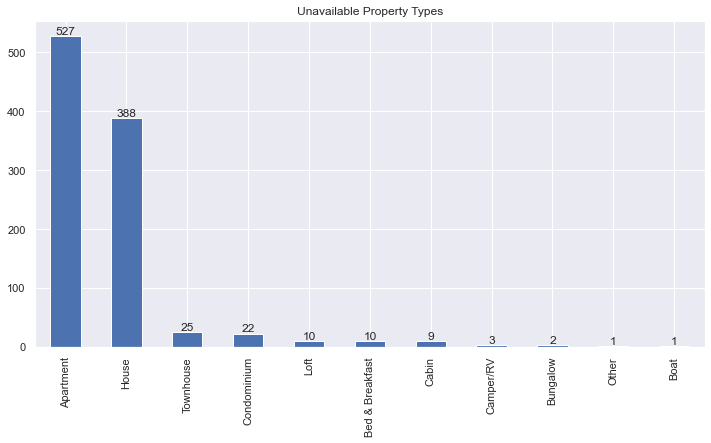

In [14]:
ax = listings_calendar_df[listings_calendar_df['available'] == 'f']['property_type'].value_counts().plot(kind='bar', figsize=(12, 6), title='Unavailable Property Types');
ax.bar_label(ax.containers[0]);

Despite the fact that the most common type of property listing are houses, it is apartment listings that are most sought by guests (assuming that unavailable listings correlate to rented properties). Therefore, it may be wise for hosts to provide listings that are apartments in the Seattle area to cater for potential guests.

#### Question 3: Can the listing review score be predicted?

Hosts that receive higher review ratings on their properties are more likely to be successful through AirBNB as guests will trust properties with good ratings as opposed to lower ones. If the review rating could be predicted based on specific property criteria, it would give great insight into what Hosts should focus on when providing properties for rent.

This question will involve machine learning.

In [15]:
# Inspect listings_df columns for potential features contributing to overall review rating

listings_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

The selected target variable is:

**Review scores rating** - this value encapsulates the score on each of the review criteria (accuracy, cleanliness, check-in, communication, location, and value)

The selected features for review score predictions are:
    
1. Host response time
2. Host is super host
3. Host identity verified
4. Neighbourhood group cleansed
5. Bathrooms
6. Bedrooms
7. Beds
8. Price
9. Instant bookable
10. Cancellation policy

In [16]:
predict_reviews_df = listings_df[['host_response_time', 'host_is_superhost', 'host_identity_verified', 
                                  'neighbourhood_group_cleansed', 'bathrooms', 'bedrooms', 'beds', 'price', 
                                  'instant_bookable', 'cancellation_policy', 'review_scores_rating']]
predict_reviews_df.head()

,host_response_time,host_is_superhost,host_identity_verified,neighbourhood_group_cleansed,bathrooms,bedrooms,beds,price,instant_bookable,cancellation_policy,review_scores_rating
0,within a few hours,f,t,Queen Anne,1.0,1.0,1.0,$85.00,f,moderate,95.0
1,within an hour,t,t,Queen Anne,1.0,1.0,1.0,$150.00,f,strict,96.0
2,within a few hours,f,t,Queen Anne,4.5,5.0,7.0,$975.00,f,strict,97.0
3,NaN,f,t,Queen Anne,1.0,0.0,2.0,$100.00,f,flexible,NaN
4,within an hour,f,t,Queen Anne,2.0,3.0,3.0,$450.00,f,strict,92.0


In [17]:
# make price column numeric

predict_reviews_df['price'] = predict_reviews_df['price'].str.replace(',', '')
predict_reviews_df['price'] = predict_reviews_df['price'].str.replace('$', '').astype(float)

The features were selected for their potential impact on guest experiences in renting a property space. Guest experiences are affected by host interactions, property characteristics, and convenience. The first three features shold encapsulate a guest's experience with the host of the proerpty being rented. The next five features deal with the property characteristics, while the final two features speak to the convenience of renting the property.

The following cells aim to use a function to:

- Remove nulls
- Enumerate categorical variables using dummy variables
- Establish target and feature variables
- Split dataset into train and test sets
- Instatiate, fit, and score a model
- Return model scores.

In [18]:
# retrieve categorical columns

categorical_columns = [col for col in predict_reviews_df.columns if predict_reviews_df[col].dtypes == 'O']
categorical_columns

['host_response_time',
 'host_is_superhost',
 'host_identity_verified',
 'neighbourhood_group_cleansed',
 'instant_bookable',
 'cancellation_policy']

In [19]:
def predict_review_rating(input_df, target_variable, categorical_columns, test_size=0.3, random_state=77):
    '''
    INPUT:
    input_df - a dataframe containing target and feature variables
    target_variable - a string representing the name of the column to be used as the response variable
    categorical_columns - a list holding strings which represent the names of categorical columns in the dataframe
    test_size - a float between [0, 1] representing the proportion of the test dataset
    random_state - an integer which declares the state of the random split into train and test variables
    
    OUTPUT:
    test_score - (float) r2 score on test data
    train_score - (float)  r2 score on train data
    model - model object from sklearn
    
    This function receives the above stated inputs and:
    - Removes nulls
    - Enumerates categorical variables using dummy variables
    - Establishes target and feature variables
    - Splits dataset into train and test sets
    - Instatiates, fits, and scores a linear model
    - Returns model scores, the model object, and the training and test sets.
    '''
    
    df = input_df.dropna(subset=[target_variable], axis=0)
    
    for col in categorical_columns: # null categorical values are considered to be important for this experiment as evidence of a "non-response"
        try:
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=True)], axis=1)
        except:
            continue
    
    fill_zeros = lambda col: col.fillna(0)
    
    # Fill numerical columns with 0 - null bedroom and bathroom values are considered to imply 0.
    df = df.apply(fill_zeros, axis=0)
    
    X = df.drop(target_variable, axis=1)
    y = df[target_variable]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    model = LinearRegression(normalize=True) # Instantiate
    model.fit(X_train, y_train) # Fit
    
    y_test_preds = model.predict(X_test)
    y_train_preds = model.predict(X_train)
    
    test_score = r2_score(y_test, y_test_preds)
    train_score = r2_score(y_train, y_train_preds)
    
    return test_score, train_score, model

In [22]:
# use function to predict review score rating

test_score, train_score, model = predict_review_rating(predict_reviews_df, 'review_scores_rating', categorical_columns)

In [23]:
# print model results
print(f"The trained model has an r2 score of {test_score} on the test set.")
print(f"The trained model has an r2 score of {train_score} on the train set.")

The trained model has an r2 score of 0.10989022032162554 on the test set.
The trained model has an r2 score of 0.10846448459010927 on the train set.


It would seem that the trained linear model did not perform well in predicting the review rating of the AirBNB experience based on the chosen feature set. It could be the case that the chosen features do not quite encapsulate the logic of the system, or perhaps individual and group reviews are simply too subjective to be accurately determined. 

The test and train r2 scores are very similar in values, which at least shows overfitting is not an issue for this particular experiment.

Perhaps a better experiment could be conducted where the targtet variable is the price to rent the property.